# App_Success_prediction

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [55]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Hp\Desktop\googleplaystore.csv")


# 1. Data Exploration and Preprocessing


In [56]:
# Display the first 5 entries of the dataset
data.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [57]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


Unnamed: 0        False
App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

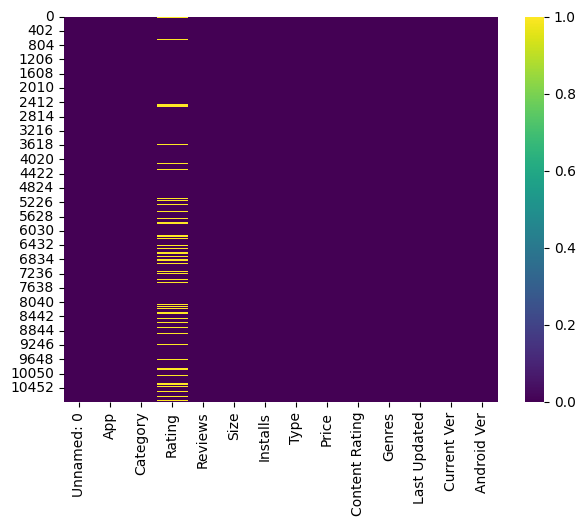

In [58]:
plt.figure(figsize=(7, 5))   
sns.heatmap(data.isnull(), cmap='viridis') # Visualize missing values
data.isnull().any() # Check missing values count

In [59]:
data.isnull().sum() # shows the number of missing value in each column respectively

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [60]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median()) #we replace the missing values of column Rating by the median of all Rating values
     

In [61]:
#we remove all the entries that have missing column values in Current Ver,Content Rating, Android Ver and Type
#we remove these entries corresponding to these columns as they have very few missing values
data = data[pd.notnull(data['Current Ver'])]
data = data[pd.notnull(data['Content Rating'])]
data = data[pd.notnull(data['Android Ver'])]
data = data[pd.notnull(data['Type'])]


In [62]:
data.isnull().sum() #to confirm that there are no further misisng values present 
     

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [63]:
data.info() #we are left with 10829 entries now, out of 10841 (remaining are removed due to the presence of missing values)

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10829 non-null  int64  
 1   App             10829 non-null  object 
 2   Category        10829 non-null  object 
 3   Rating          10829 non-null  float64
 4   Reviews         10829 non-null  object 
 5   Size            10829 non-null  object 
 6   Installs        10829 non-null  object 
 7   Type            10829 non-null  object 
 8   Price           10829 non-null  object 
 9   Content Rating  10829 non-null  object 
 10  Genres          10829 non-null  object 
 11  Last Updated    10829 non-null  object 
 12  Current Ver     10829 non-null  object 
 13  Android Ver     10829 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


# Studying Each Attribute in detail and cleaning it

### 1. Size

In [64]:
#function to convert MB and KB in bytes
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

data["Size"] = data["Size"].map(change_size) #update the Size column with these new values
     

In [65]:
data['Size'] = data['Size'].ffill()


Text(0, 0.5, 'Frequency')

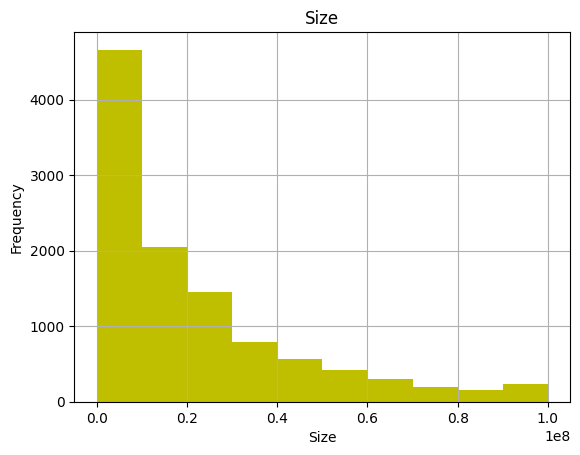

In [66]:
data.hist(column='Size', color='y') 
plt.xlabel('Size')
plt.ylabel('Frequency')
     

### 2.Installs

In [67]:
data.Installs.value_counts()

Installs
1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+             905
5,000,000+         752
100+               718
500,000+           538
50,000+            478
5,000+             476
100,000,000+       409
10+                385
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: count, dtype: int64

In [68]:
#as linear regression deals with float values, we will remove any additional symbols present
data.Installs=data.Installs.apply(lambda x: x.strip('+'))  #remove symbol '+'
data.Installs=data.Installs.apply(lambda x: x.replace(',','')) #remove symbol ','

In [69]:
data['Installs'] = data['Installs'].astype(float)

In [70]:
data.Installs.value_counts()

Installs
1.000000e+06    1578
1.000000e+07    1252
1.000000e+05    1169
1.000000e+04    1052
1.000000e+03     905
5.000000e+06     752
1.000000e+02     718
5.000000e+05     538
5.000000e+04     478
5.000000e+03     476
1.000000e+08     409
1.000000e+01     385
5.000000e+02     330
5.000000e+07     289
5.000000e+01     205
5.000000e+00      82
5.000000e+08      72
1.000000e+00      67
1.000000e+09      58
0.000000e+00      14
Name: count, dtype: int64

### 3.Reviews

In [71]:
data.Reviews.str.isnumeric().sum() #checking if all 10829 Reviews are numeric values

10829

In [72]:
data['Reviews'] = data['Reviews'].astype(int) #converting 'object' type Reviews to type 'int'
     

### 4.Rating

In [73]:
#checking the range of the values of the Rating column
print("Range: ", data.Rating.min(),"-",data.Rating.max()) 

Range:  1.0 - 5.0


Text(0, 0.5, 'Frequency')

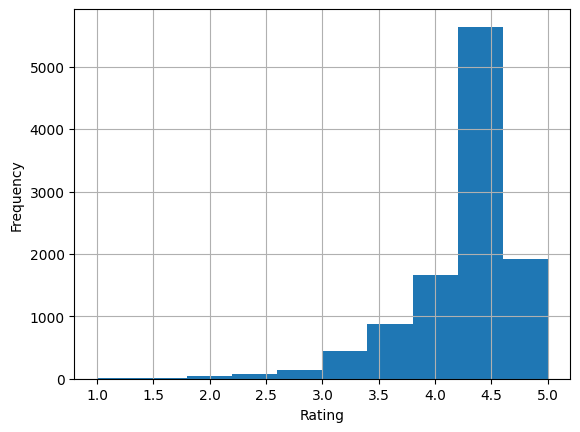

In [74]:
data.Rating.hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

### 5.Type

In [75]:
data.Type.value_counts() #Prints the number of Free and Paid app

Type
Free    10032
Paid      797
Name: count, dtype: int64

In [76]:
#Function that converts the Type value to '0' for free app and '1' for paid app
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

data['Type'] = data['Type'].map(type_cat) #updated type value

### 6.Price

In [77]:
data.Price=data.Price.apply(lambda x: x.strip('$'))  #removing the symbol '$'
data['Price'] = data['Price'].astype(float)

In [78]:

data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

### 7.Category

<Axes: xlabel='Category'>

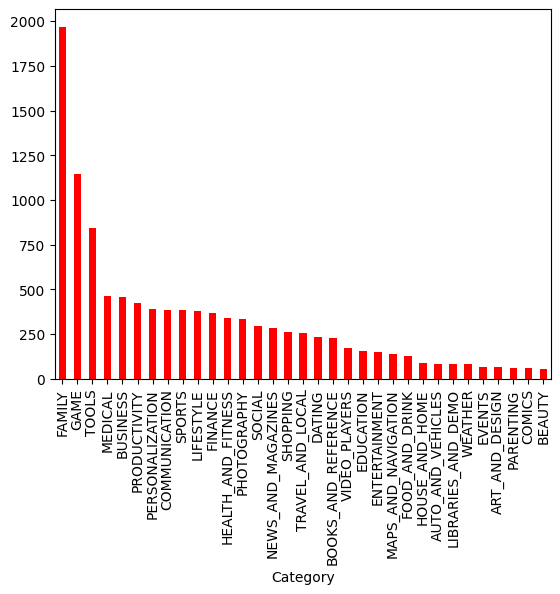

In [79]:
data.Category.value_counts().plot(kind='bar',color='r')

In [80]:
#giving discrete dummy values to discrete Categories and adding them in a new Column 'Category_new'
CategoryL = data.Category.unique()
CategoryDict = {}
for i in range(len(CategoryL)):
    CategoryDict[CategoryL[i]] = i
data['Category_new'] = data['Category'].map(CategoryDict).astype(int)

### 8.Content Rating

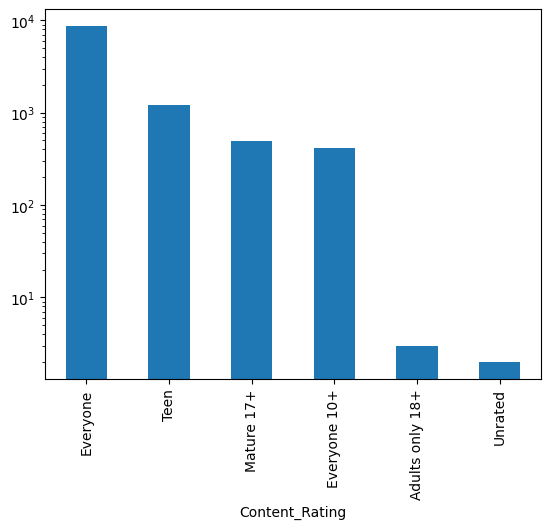

In [81]:
data.columns = data.columns.str.replace(' ', '_') #for ex: replacing column name 'Content Rating' with 'Content_Rating'
data.Content_Rating.value_counts().plot(kind='bar')
plt.yscale('log')

In [82]:
#giving discrete dummy values to discrete Content Rating and updating them in the column
RatingL = data['Content_Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
data['Content_Rating'] = data['Content_Rating'].map(RatingDict).astype(int)
     

### 9. Genres

In [83]:
#giving discrete dummy values to discrete Genres and adding them in a new Column 'Genre_new'
GenresL = data.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
data['Genres_new'] = data['Genres'].map(GenresDict).astype(int)

### 10.Remaining

In [84]:
#dropping the columns that are not relevant for our linear regression
data.drop(labels = ['Last_Updated','Current_Ver','Android_Ver','App'], axis = 1, inplace = True)
     

## Correlation Analysis:

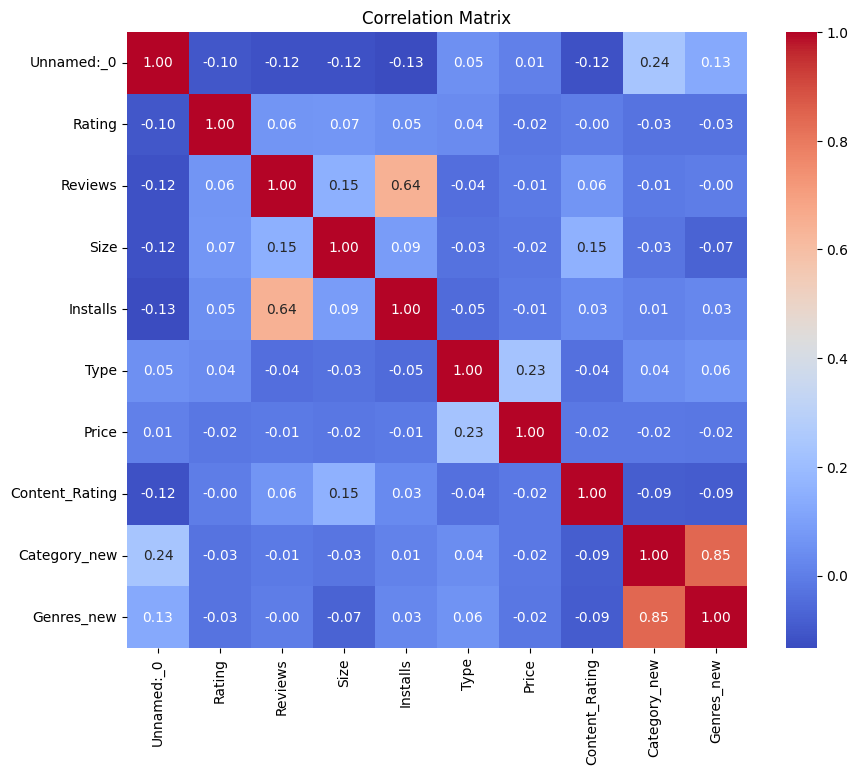

In [85]:
# Calculate correlation matrix for numeric columns only
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Final Databse

In [34]:
data.head() #first 5 entries of the updated dataframe

,Unnamed:_0,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Category_new,Genres_new
0,0,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,0,0.0,0,Art & Design,0,0
1,1,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,0,0.0,0,Art & Design;Pretend Play,0,1
2,2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,0,0.0,0,Art & Design,0,0
3,3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,0,0.0,1,Art & Design,0,0
4,4,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,0,0.0,0,Art & Design;Creativity,0,2


In [35]:
data.info() #checking if all the fields except 'Category' and 'Genres' are of either 'int6

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed:_0      10829 non-null  int64  
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  float64
 6   Type            10829 non-null  int64  
 7   Price           10829 non-null  float64
 8   Content_Rating  10829 non-null  int32  
 9   Genres          10829 non-null  object 
 10  Category_new    10829 non-null  int32  
 11  Genres_new      10829 non-null  int32  
dtypes: float64(4), int32(4), int64(2), object(2)
memory usage: 930.6+ KB


## Linear Regression Model Building

In [36]:
X = data.drop(labels=['Category', 'Rating', 'Genres'], axis=1)  # We remove the irrelevant columns
Y = data['Rating']  # Rating column is to be predicted and is assigned to Y


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30) #split 10829 entries into training sample(70%) amd test sample(30%)
model = LinearRegression() #model type will be linear regression
     


In [38]:
#fitting the model with the training set 
model.fit(X_train,Y_train)

LinearRegression()

In [39]:
print('Intercept: \n', model.intercept_) #value of b0

Intercept: 
 4.263807808984543


In [40]:
coeff_df = pd.DataFrame(model.coef_, index=['Intercept', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Category_new', 'Genres_new'], columns=['Coefficient'])
coeff_df

,Coefficient
Intercept,-1.453261e-05
Reviews,6.756353e-09
Size,1.121811e-09
Installs,2.784564e-11
Type,1.192458e-01
Price,-9.657862e-04
Content_Rating,-8.171338e-03
Category_new,5.478426e-04
Genres_new,-4.750468e-04


In [41]:
# Check the shape of the coefficient array
print(model.coef_.shape)


(9,)


In [42]:
Y_pred = model.predict(X_test) # Ratings are predicted using the regression model and saved in Y_pred
Y_pred

array([4.13669105, 4.31836288, 4.08022732, ..., 4.18482208, 4.29283892,
       4.1813829 ])

In [43]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) 
df2=df1.head(20) 

Text(0, 0.5, 'rating')

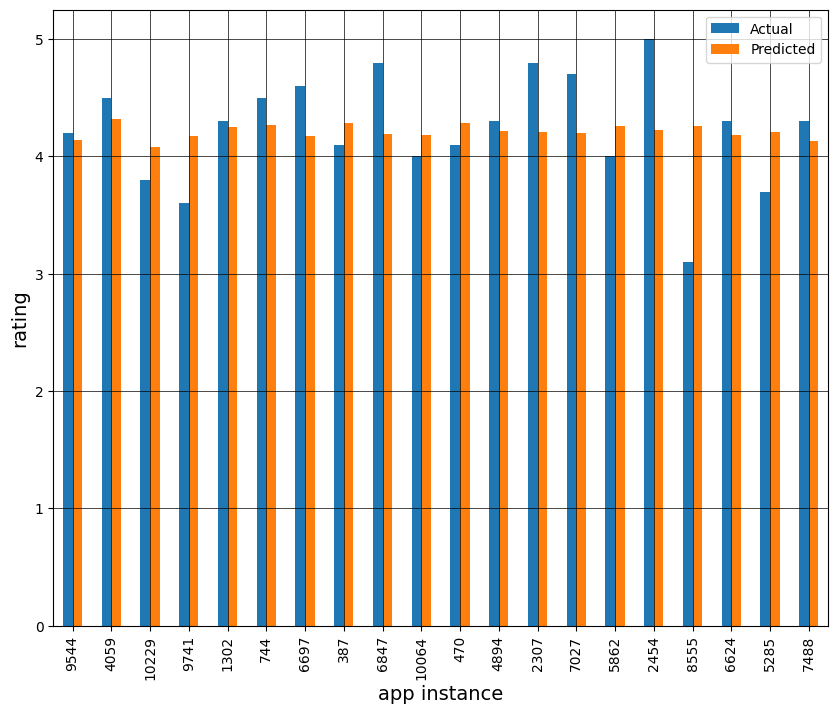

In [44]:
df2.plot(kind='bar',figsize=(10,8)) #actual vs predicted Rating values
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='white')
plt.xlabel('app instance',color='black',fontsize=14)
plt.ylabel('rating',color='black',fontsize = 14)

Text(0, 0.5, 'Predicted Y')

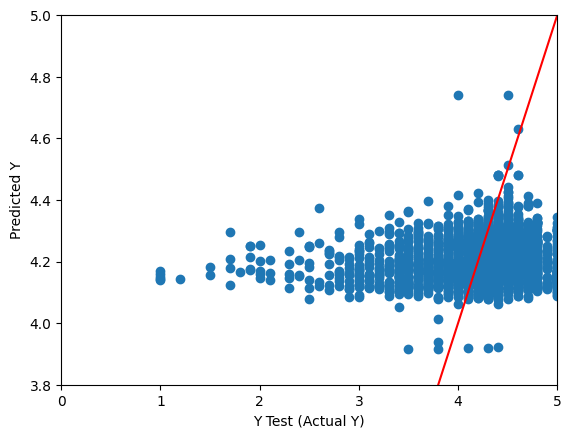

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(Y_test, Y_pred)
plt.ylim(3.8, 5)
plt.xlim(0, 5)

x = np.linspace(0, 5, 30)
plt.plot(x, x + 0, '-r')  # Removed linestyle='solid'

plt.xlabel('Y Test (Actual Y)')
plt.ylabel('Predicted Y')


### Evaluation Matrix

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error:', mse)

# Calculate the mean absolute error
mae = mean_absolute_error(Y_test, Y_pred)
print('Mean Absolute Error:', mae)

# Calculate the mean squared log error
msle = mean_squared_log_error(Y_test, Y_pred)
print('Mean Squared Log Error:', msle)

# Calculate the R2 score
r2 = r2_score(Y_test, Y_pred)
print('R2 Score:', r2)


Mean Squared Error: 0.22825998288284563
Mean Absolute Error: 0.324357117149115
Mean Squared Log Error: 0.011186270546994892
R2 Score: 0.016116861637990976


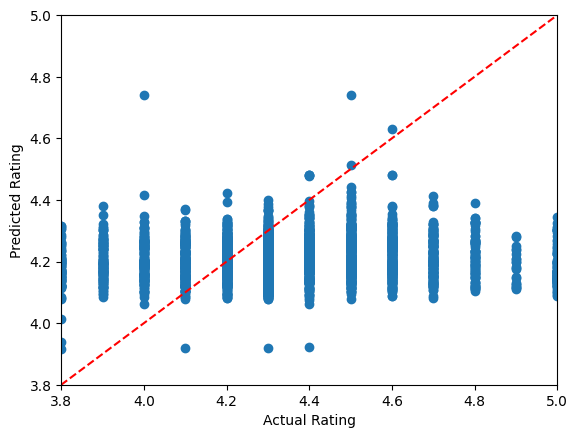

In [48]:
# Scatter plot of actual vs predicted values
plt.scatter(Y_test, Y_pred)  
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

# Plotting the regression line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')

plt.ylim(3.8, 5) 
plt.xlim(3.8, 5)

plt.show()


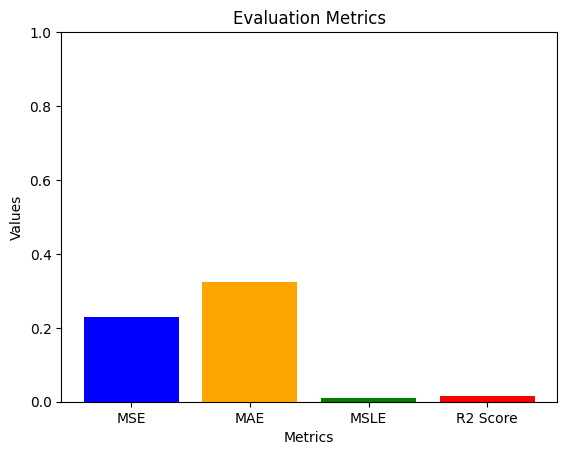

In [51]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics_names = ['MSE', 'MAE', 'MSLE', 'R2 Score']
metrics_values = [mse, mae, msle, r2]

plt.bar(metrics_names, metrics_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1
plt.show()
